<a href="https://colab.research.google.com/github/logicpro09/group5/blob/main/Final_Project_Report_Team_Number5_draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Introduction
Background on the Dataset

    Dataset Source:
    "This data comes straight from the San Diego Police Department's RIPA (Racial and Identity Profiling Act) records. Collected by law enforcement itself, this dataset is an unfiltered look into the reality of policing practices. It’s designed to put transparency and accountability at the forefront, revealing how stops are conducted across California."

    Description of the Dataset:
    "This isn’t just a spreadsheet; it’s over [number] records detailing the who, what, and why of police stops. We’re talking demographics, reasons for stops, actions taken, and more. With key data points like race, ethnicity, violation type, and officer decisions, this dataset offers a hard look at how policies and practices might favor or disadvantage specific groups."

    Purpose of Analysis:
    "Our goal? To expose any patterns and disparities in police stops—raw data, real insights. We’re investigating if some groups face different outcomes based on race or other factors. This analysis will arm decision-makers with facts to address biases and raise the bar for accountability in law enforcement."

Significance of the Problem

    Contextual Importance:
    "Racial disparity in police stops isn’t just a statistic—it’s a critical social issue that demands attention. Fair treatment under the law isn’t optional; it’s essential. Exposing these disparities can push for real change, ensuring that law enforcement practices meet the standard that every citizen deserves."

    Value of Insights:
    "By getting to the bottom of this data, we’re offering something more than just numbers. Law enforcement, policymakers, and community leaders can use these insights to take real, actionable steps. It’s about more than addressing bias—it’s about strengthening community trust and implementing policy that actually works for everyone."

    Research Gap:
    "Racial profiling has been studied in a lot of places, but San Diego? Not enough. This analysis doesn’t just fill that gap; it’s a statement. It provides hard-hitting data on San Diego’s practices, something local officials and citizens can actually work with."

In [353]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Import Libraries and Load Data

First, load the datasets into Google Colab or your Python environment. We’ll use pandas for data handling and basic analysis.

In [354]:
import pandas as pd

# Load datasets
ripa_stop_result = pd.read_csv('/content/drive/MyDrive/ripa_stop_result_datasd.csv')
ripa_race = pd.read_csv('/content/drive/MyDrive/ripa_race_datasd.csv')
quick_facts = pd.read_csv('/content/drive/MyDrive/QuickFacts Oct-09-2024.csv')
sd_pop = pd.read_csv('/content/drive/MyDrive/san_diego_population_by_race.csv')

# Preview the first few rows of each dataset
print(ripa_stop_result.head())
print(ripa_race.head())
print(sd_pop.head())


   stop_id  pid  resultkey                            result     code  \
0        1    1          3           Citation for infraction  42127.0   
1        2    1          3           Citation for infraction  54303.0   
2        3    1          2       Warning (verbal or written)  54098.0   
3        4    1          6  Custodial Arrest without warrant  13174.0   
4        5    1          2       Warning (verbal or written)  54306.0   

                                          resulttext  
0          12500(A) VC - DRIVE W/O LICENSE (I) 42127  
1    22349(A) VC - EXCEED SPEED ON HIGHWAY (I) 54303  
2  21453(A) VC - FAIL STOP LINE/ETC AT RED (I) 54098  
3  243(E)(1) PC - BAT:SPOUSE/EX SP/DATE/ETC (M) 1...  
4       22400(A) VC - DRIVE TOO SLOWLY/ETC (I) 54306  
   stop_id  pid                    race
0        1    1      Hispanic/Latino(a)
1        2    1        Pacific Islander
2        2    1                   White
3        2    1  Black/African American
4        2    1                

2. Initial Data Assessment

Use .info() and .describe() to identify data types, check for missing values, and see general statistics.

In [355]:
# Check data types and missing values for each dataset
print(ripa_stop_result.info())
print(ripa_race.info())
print(sd_pop.info())

# Get summary statistics for each dataset
print(ripa_stop_result.describe())
print(ripa_race.describe())
print(sd_pop.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   stop_id     9471 non-null   int64  
 1   pid         9471 non-null   int64  
 2   resultkey   9471 non-null   int64  
 3   result      9094 non-null   object 
 4   code        7087 non-null   float64
 5   resulttext  7087 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 444.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9105 entries, 0 to 9104
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   stop_id  9105 non-null   int64 
 1   pid      9105 non-null   int64 
 2   race     9105 non-null   object
dtypes: int64(2), object(1)
memory usage: 213.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ---

3. Data Cleaning and Preparation
Step 3.1: Handle Missing Values

Identify columns with missing values and decide on a strategy (e.g., drop or fill).

In [356]:
import pandas as pd
import numpy as np  # Import NumPy and assign it the alias 'np'

# Check data types and missing values for each dataset
print(ripa_stop_result.info())
print(ripa_race.info())
print(sd_pop.info())

# Get summary statistics for each dataset
print(ripa_stop_result.describe())
print(ripa_race.describe())
print(sd_pop.describe())

# Check missing values
print(ripa_stop_result.isnull().sum())
print(ripa_race.isnull().sum())
print(sd_pop.isnull().sum())

# Get the actual column names from the DataFrame
ripa_stop_result_columns = ripa_stop_result.columns.tolist()

# Print the column names to verify (optional but helpful for debugging)
print("Columns in ripa_stop_result:", ripa_stop_result_columns)

# Replace 'column1', 'column2' with actual column names from ripa_stop_result_columns
# Example:
# ripa_stop_result.dropna(subset=['actual_column_name1', 'actual_column_name2'], inplace=True)
# Choose the appropriate column names based on the output of ripa_stop_result_columns
# Make sure the selected columns are the ones where you want to drop rows with missing values.
ripa_stop_result.dropna(subset=[ripa_stop_result_columns[0], ripa_stop_result_columns[1]], inplace=True)  # Drop only critical columns

ripa_race.fillna({'column_name': 'Unknown'}, inplace=True)  # Example fill for categorical data

# Convert problematic columns in quick_facts to numeric, coerce errors to NaN
for column in quick_facts.select_dtypes(include=['object']).columns:  # Select object type columns
    try:
        quick_facts[column] = pd.to_numeric(quick_facts[column], errors='coerce')  # Coerce errors to NaN
    except ValueError:
        print(f"Could not convert column '{column}' to numeric.")

# Now fill NaN values with the mean for numeric columns only
quick_facts.fillna(quick_facts.select_dtypes(include=np.number).mean(), inplace=True)  # Example fill for numerical data, select numeric columns only

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   stop_id     9471 non-null   int64  
 1   pid         9471 non-null   int64  
 2   resultkey   9471 non-null   int64  
 3   result      9094 non-null   object 
 4   code        7087 non-null   float64
 5   resulttext  7087 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 444.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9105 entries, 0 to 9104
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   stop_id  9105 non-null   int64 
 1   pid      9105 non-null   int64 
 2   race     9105 non-null   object
dtypes: int64(2), object(1)
memory usage: 213.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ---

Step 3.1: Identify and Drop Rows with Missing Values (Critical Columns)

First, print out the column names in ripa_stop_result to identify which columns contain missing values and decide on which columns are critical to your analysis.

In [357]:
# Print column names to identify relevant ones
ripa_stop_result_columns = ripa_stop_result.columns.tolist()
print("Columns in ripa_stop_result:", ripa_stop_result_columns)

# Drop rows with missing values in critical columns (update with actual column names)
ripa_stop_result.dropna(subset=[ripa_stop_result_columns[0], ripa_stop_result_columns[1]], inplace=True)


Columns in ripa_stop_result: ['stop_id', 'pid', 'resultkey', 'result', 'code', 'resulttext']


Step 3.2: Fill Missing Categorical Data in ripa_race

Fill missing values in ripa_race with placeholder values where needed (replace 'column_name' with actual column names).

In [358]:
ripa_race.fillna({'column_name': 'Unknown'}, inplace=True)  # Replace 'column_name' as appropriate


Step 3.3: Convert Object Columns to Numeric in quick_facts and Fill NaNs

    Convert object columns to numeric where possible, coercing errors to NaN.
    Fill NaN values in numeric columns with the mean.

python

In [359]:
# Convert columns to numeric, coercing errors
#for column in sd_pop.select_dtypes(include=['object']).columns:
    #sd_pop[column] = pd.to_numeric(sd_pop[column], errors='coerce')

# Fill NaNs in numeric columns with the mean
#sd_pop.fillna(quick_facts.select_dtypes(include=np.number).mean(), inplace=True)


4. Standardize Column Names

To keep naming consistent, standardize all column names by converting to lowercase and replacing spaces with underscores.

In [360]:
# Standardize column names
ripa_stop_result.columns = ripa_stop_result.columns.str.lower().str.replace(' ', '_')
ripa_race.columns = ripa_race.columns.str.lower().str.replace(' ', '_')
sd_pop.columns = sd_pop.columns.str.lower().str.replace(' ', '_')


5. Convert Data Types

Adjust data types as needed (e.g., convert dates and categorical data) to optimize for analysis.

In [361]:
# Convert date columns to datetime format if any
# Replace 'date_column' with the actual name of your date column
# Check the actual column name in your ripa_stop_result DataFrame
date_column_name = ripa_stop_result.columns[0]  # Assuming the date column is the first column
# You can find the correct column name by printing ripa_stop_result.columns
ripa_stop_result[date_column_name] = pd.to_datetime(ripa_stop_result[date_column_name], errors='coerce')

# Convert specific columns to categorical data if relevant
ripa_race['race'] = ripa_race['race'].astype('category')

6. Remove Duplicates

Remove duplicate rows if they exist.

In [362]:
# Drop duplicate rows in each dataset
ripa_stop_result.drop_duplicates(inplace=True)
ripa_race.drop_duplicates(inplace=True)
sd_pop.drop_duplicates(inplace=True)


7. Merge Datasets (If Applicable)

Merge ripa_stop_result, ripa_race, and quick_facts if they share a common identifier.

In [363]:
ripa_stop_result['stop_id'] = ripa_stop_result['stop_id'].astype(int)
ripa_race['stop_id'] = ripa_race['stop_id'].astype(int)

In [364]:
import pandas as pd

# Assuming ripa_stop_result, ripa_race, and quick_facts are already loaded

# Convert date columns to datetime format if any
# Replace 'date_column' with the actual name of your date column
# Check the actual column name in your ripa_stop_result DataFrame
# Assuming the date column is the first column in ripa_stop_result
# Adjust if necessary
date_column_name = ripa_stop_result.columns[0]
# This gets the name of the first column - update if it's not your date column
ripa_stop_result[date_column_name] = pd.to_datetime(ripa_stop_result[date_column_name], errors='coerce')

# Convert specific columns to categorical data if relevant
ripa_race['race'] = ripa_race['race'].astype('category')

# Drop duplicate rows in each dataset
ripa_stop_result.drop_duplicates(inplace=True)
ripa_race.drop_duplicates

<bound method DataFrame.drop_duplicates of       stop_id  pid                           race
0           1    1             Hispanic/Latino(a)
1           2    1               Pacific Islander
2           2    1                          White
3           2    1         Black/African American
4           2    1                          Asian
...       ...  ...                            ...
9100     8314    1             Hispanic/Latino(a)
9101     8315    1             Hispanic/Latino(a)
9102     8316    1                          White
9103     8317    1                          Asian
9104     8318    1  Middle Eastern or South Asian

[9105 rows x 3 columns]>

8. Feature Engineering (If Necessary)

Add any derived columns that may assist in the analysis.

In [365]:
# Convert 'stop_id' to a consistent data type (int) in both DataFrames:
ripa_stop_result['stop_id'] = ripa_stop_result['stop_id'].astype(int)
ripa_race['stop_id'] = ripa_race['stop_id'].astype(int)

# Now you can merge the DataFrames
final_data = pd.merge(ripa_stop_result, ripa_race, on='stop_id', how='inner')

9. Final Data Review

Ensure all columns are clean, standardized, and ready for analysis.

In [366]:
# Final check
print(final_data.info())
print(final_data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13075 entries, 0 to 13074
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   stop_id     13075 non-null  int64   
 1   pid_x       13075 non-null  int64   
 2   resultkey   13075 non-null  int64   
 3   result      12549 non-null  object  
 4   code        9358 non-null   float64 
 5   resulttext  9358 non-null   object  
 6   pid_y       13075 non-null  int64   
 7   race        13075 non-null  category
dtypes: category(1), float64(1), int64(4), object(2)
memory usage: 728.3+ KB
None
stop_id          0
pid_x            0
resultkey        0
result         526
code          3717
resulttext    3717
pid_y            0
race             0
dtype: int64


#Exploratory Data Analysis
### We will explore the data by finding a model that will work best to determine if certain races in San Diego California have a higher rate of police stops.

`A review of the data`

In [367]:
race_stop_counts = final_data['race'].value_counts()

total_stops = final_data.shape[0]

race_stop_percentages = (race_stop_counts / total_stops) * 100

race_stop_percentage_df = pd.DataFrame({
    'Race': race_stop_counts.index,
    'Number of Stops': race_stop_counts.values,
    'Percentage of Stops': race_stop_percentages.values
})

print(race_stop_percentage_df)

                            Race  Number of Stops  Percentage of Stops
0             Hispanic/Latino(a)             4793            36.657744
1                          White             4334            33.147228
2         Black/African American             2353            17.996176
3                          Asian              769             5.881453
4  Middle Eastern or South Asian              538             4.114723
5               Pacific Islander              176             1.346080
6                Native American              106             0.810707
7             Hispanic/Latine(x)                6             0.045889


In [368]:
sd_pop

,race,percentage,population
0,White,46.8,649733
1,Hispanic,33.4,463698
2,Black,4.5,62474
3,Asian,9.9,137443
4,Other,5.4,74969


`We use mapping to simplify race names and combine hispanic categories. We also narrow our dataset to the top 4 largest racial categories of police stops.`

In [369]:
# Ensure both race columns are lowercase for consistency and remove any leading/trailing spaces
race_stop_percentage_df['Race'] = race_stop_percentage_df['Race'].str.lower().str.strip()
sd_pop['race'] = sd_pop['race'].str.lower().str.strip()

# Update race mapping to combine hispanic/latino(a) and hispanic/latine(x) into hispanic
race_mapping = {
    'white': 'white',
    'hispanic/latino(a)': 'hispanic',
    'black/african american': 'black',
    'asian': 'asian',
    'hispanic/latine(x)': 'hispanic'
}

# Apply race mapping to final_data
#final_data['race'] = final_data['race'].replace(race_mapping)

# Apply race mapping to race_stop_percentage_df
race_stop_percentage_df['Race'] = race_stop_percentage_df['Race'].replace(race_mapping)

# Filter both dataframes to include only 'hispanic', 'white', 'black', and 'asian'
desired_races = ['hispanic', 'white', 'black', 'asian']
race_stop_percentage_df = race_stop_percentage_df[race_stop_percentage_df['Race'].isin(desired_races)]
sd_pop = sd_pop[sd_pop['race'].isin(desired_races)]

# Group by race to ensure combined entries for 'hispanic'
race_stop_percentage_df = race_stop_percentage_df.groupby('Race', as_index=False).sum()
race_stop_percentage_df = race_stop_percentage_df.rename(columns={'Race': 'race'})

# Merge the filtered data
merged_data = pd.merge(race_stop_percentage_df, sd_pop, on='race', how='inner')
merged_data = merged_data.rename(columns={'percentage': 'Population_Percentage'})
merged_data['Difference'] = merged_data['Percentage of Stops'] - merged_data['Population_Percentage']

# Print the merged data to verify the output
print(merged_data)



       race  Number of Stops  Percentage of Stops  Population_Percentage  \
0     asian              769             5.881453                    9.9   
1     black             2353            17.996176                    4.5   
2  hispanic             4799            36.703633                   33.4   
3     white             4334            33.147228                   46.8   

   population  Difference  
0      137443   -4.018547  
1       62474   13.496176  
2      463698    3.303633  
3      649733  -13.652772  


`(1) We begin by running our data, race of the individual stopped and result of the stop, through a logistic regression model using a test size of 20%, train size of 80%. We run the model on each racial category. This yields the following:

Race: hispanic ; Accuracy: 0.6347992351816444

Race: Pacific Islander ; Accuracy: 0.9854684512428298

Race: white ; Accuracy: 0.6715105162523901

Race: black ; Accuracy: 0.8175908221797323

Race: asian ; Accuracy: 0.9445506692160612

Race: Native American ; Accuracy: 0.9908221797323136

Race: Middle Eastern or South Asian ; Accuracy: 0.9564053537284894

In [370]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Get unique races  in dataset
unique_races = final_data['race'].unique()

# Initialize dictionary to store results for each race
race_stop_counts = {}

# Use loop over race and run log regression
for race in unique_races:
  # Create binary variable for current race(1 if race matches, 0 otherwise)
  final_data[f'is_{race}'] = final_data['race'].apply(lambda x: 1 if x == race else 0)
  # Set ind variable(X) using type of stop
  X = pd.get_dummies(final_data['result'], drop_first=True)
  # Set dep variable (y) 1 for this race, 0 for others
  y = final_data[f'is_{race}']
  # Train/Test Split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # Fit log regression model
  model = LogisticRegression(max_iter=1000)
  model.fit(X_train, y_train)

  # Predict
  y_pred = model.predict(X_test)
  y_pred_prob = model.predict_proba(X_test)[:, 1]

  # Evaluate
  accuracy = model.score(X_test, y_test)

  # Coefficients
  coefficients = pd.DataFrame(model.coef_, columns=X.columns)

  # Store in dict
  race_stop_counts[race] = {
      'accuracy': accuracy,
      'coefficients': coefficients
  }

# Display results for each race
for race, result in race_stop_counts.items():
  print(f"Race: {race}")
  print(f"Accuracy: {result['accuracy']}")


Race: Hispanic/Latino(a)
Accuracy: 0.6351816443594647
Race: Pacific Islander
Accuracy: 0.9854684512428298
Race: White
Accuracy: 0.6715105162523901
Race: Black/African American
Accuracy: 0.8175908221797323
Race: Asian
Accuracy: 0.9445506692160612
Race: Native American
Accuracy: 0.9908221797323136
Race: Middle Eastern or South Asian
Accuracy: 0.9564053537284894
Race: Hispanic/Latine(x)
Accuracy: 0.9996175908221797


`(2) At this point with our focus on the following racial groups: Asian, Black, Hispanic, and White. We plot the population percentage and percentage of stops by race to visualize the data. We can immediately see that blacks and hispanics have a higher percentage of stops compared to their population percentage.

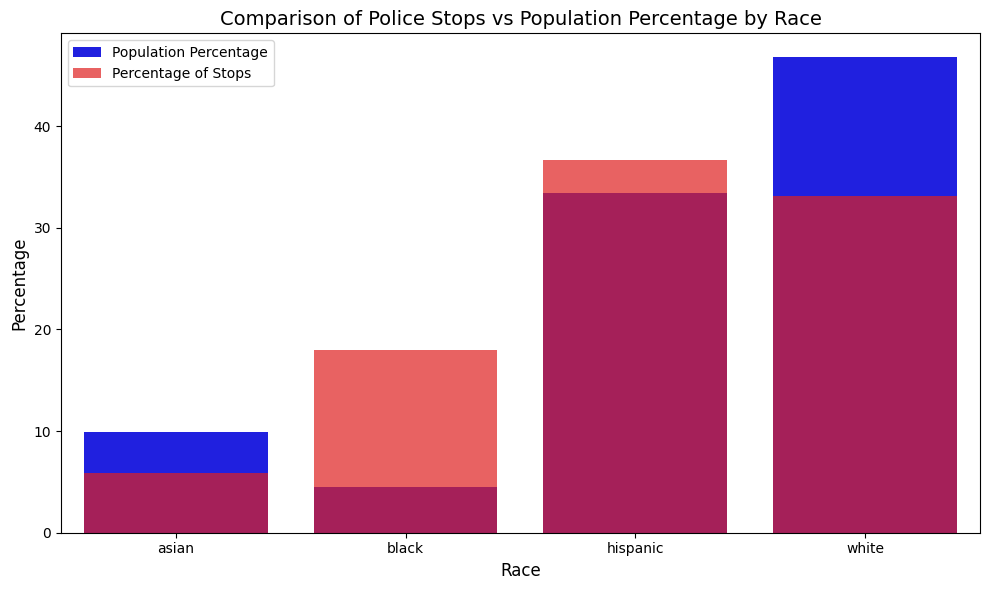

In [371]:

import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axis
plt.figure(figsize=(10,6))

# Plot Population Percentage and Percentage of Stops for each race
sns.barplot(x='race', y='Population_Percentage', data=merged_data, color='b', label='Population Percentage')
sns.barplot(x='race', y='Percentage of Stops', data=merged_data, color='r', alpha=0.7, label='Percentage of Stops')

# Add labels and title
plt.title('Comparison of Police Stops vs Population Percentage by Race', fontsize=14)
plt.xlabel('Race', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


`We now plot the comparison of population percentage and police stops by race. It is clear that Blacks and Hispanics are stopped proportionally higher than Asians and Whites.

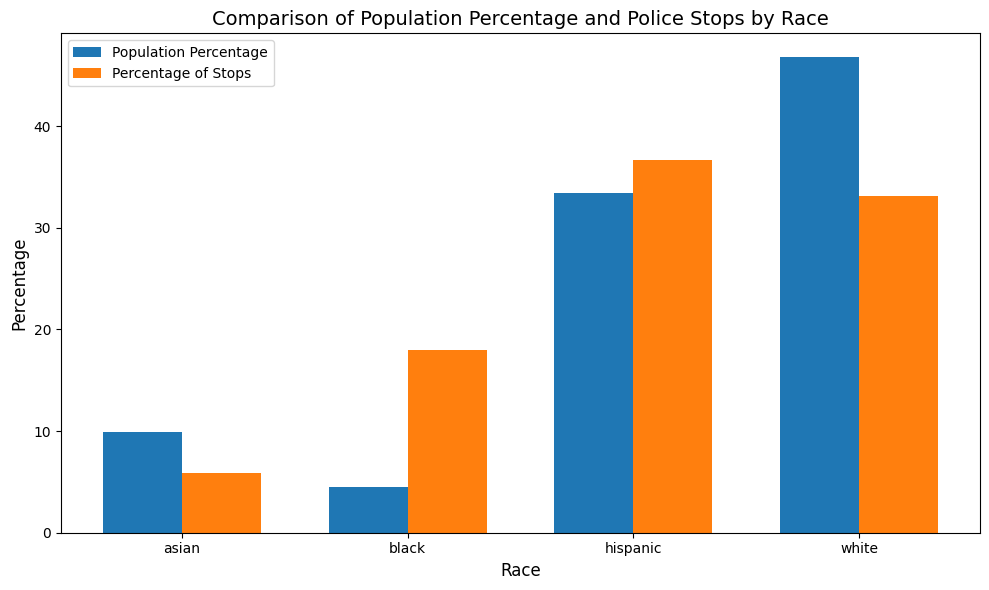

In [372]:
import matplotlib.pyplot as plt
import numpy as np

# Data for races
races = merged_data['race']
population_percentage = merged_data['Population_Percentage']
stops_percentage = merged_data['Percentage of Stops']

# Plot settings
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(races))

# Bars for population and stops
bar1 = plt.bar(index, population_percentage, bar_width, label='Population Percentage')
bar2 = plt.bar(index + bar_width, stops_percentage, bar_width, label='Percentage of Stops')

# Add labels and title
plt.xlabel('Race', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.title('Comparison of Population Percentage and Police Stops by Race', fontsize=14)
plt.xticks(index + bar_width / 2, races)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


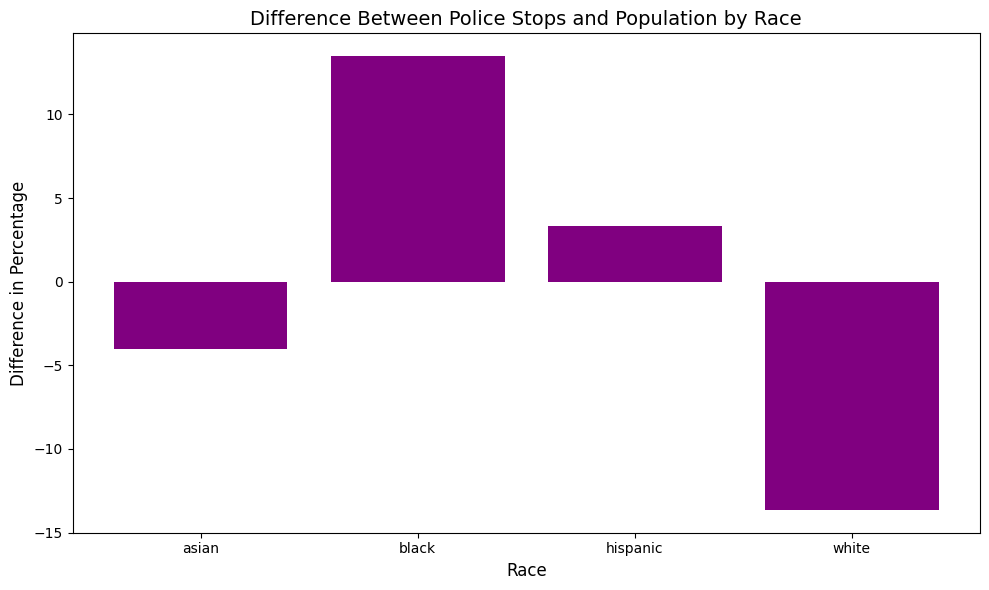

In [373]:
# Plot the difference between Percentage of Stops and Population Percentage
plt.figure(figsize=(10, 6))
plt.bar(races, merged_data['Difference'], color='purple')

# Add labels and title
plt.xlabel('Race', fontsize=12)
plt.ylabel('Difference in Percentage', fontsize=12)
plt.title('Difference Between Police Stops and Population by Race', fontsize=14)

# Show plot
plt.tight_layout()
plt.show()


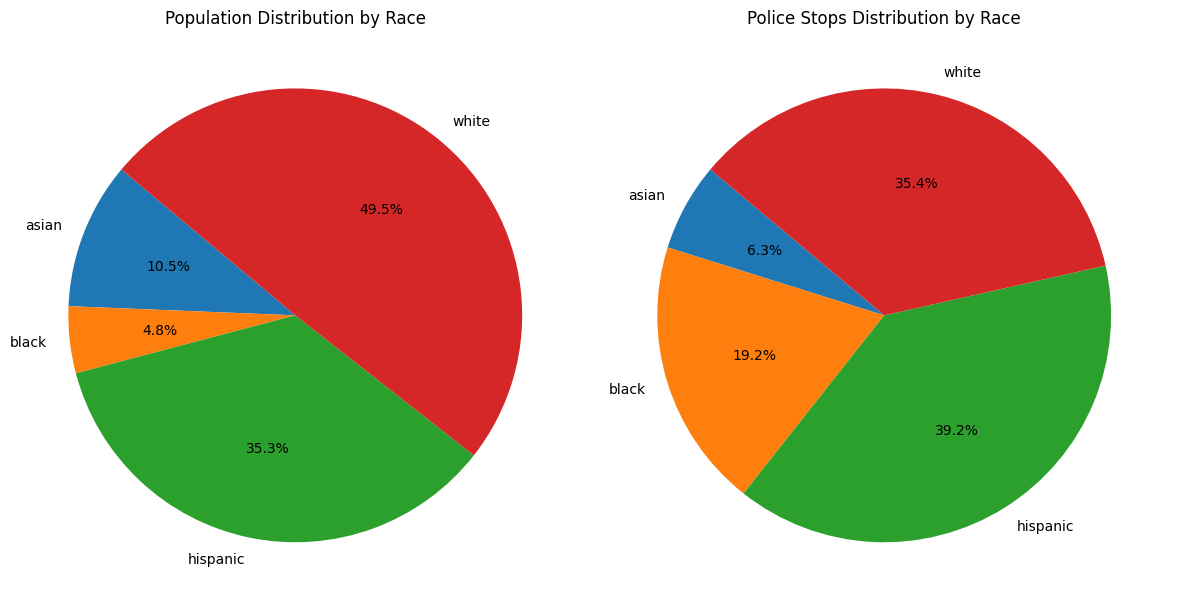

In [374]:
# Pie chart for Population Percentage
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie(population_percentage, labels=races, autopct='%1.1f%%', startangle=140)
plt.title('Population Distribution by Race')

# Pie chart for Percentage of Stops
plt.subplot(1, 2, 2)
plt.pie(stops_percentage, labels=races, autopct='%1.1f%%', startangle=140)
plt.title('Police Stops Distribution by Race')

# Show plot
plt.tight_layout()
plt.show()


` We use logistic regression to predict the probability of racial groups being stopped by police. Logistic regression does not yield great results and only shows a 50% chance for all racial groups of being stopped. This leads me to believe that logistic regression may not be the best model to predict for our data.

In [375]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder


# Set the target variable (y) based on whether Percentage of Stops > Population Percentage
y = (merged_data['Percentage of Stops'] > merged_data['Population_Percentage']).astype(int)

# One-hot encode the 'race' column to create dummy variables
encoder = OneHotEncoder(drop='first')
X = encoder.fit_transform(merged_data[['race']])

# Use StratifiedShuffleSplit to ensure all races are represented in both train and test sets
# Increase the test_size further to ensure representation (use 50% for better balance)
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=42)

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

# Check the distribution of target classes to ensure all races are represented
print("Training target distribution:", y_train.value_counts())
print("Test target distribution:", y_test.value_counts())

# Instantiate and fit the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Evaluate the model
train_accuracy = log_reg.score(X_train, y_train)
test_accuracy = log_reg.score(X_test, y_test)

# Print accuracy
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

# Get probabilities of being stopped by race
probabilities = log_reg.predict_proba(X_test)[:, 1]  # Probability of being stopped

# Flatten races after inverse transforming from one-hot encoding
races = encoder.inverse_transform(X_test).flatten()

# Create a DataFrame to store the results
# Show probabilities for each race in test set
predictions = pd.DataFrame({
    'Race': races,
    'Probability of Being Stopped': probabilities
})

# Display the predicted probabilities
print(predictions)




Training target distribution: 1    1
0    1
Name: count, dtype: int64
Test target distribution: 1    1
0    1
Name: count, dtype: int64
Training Accuracy: 1.00
Test Accuracy: 0.50
       Race  Probability of Being Stopped
0  hispanic                           0.5
1     asian                           0.5


#Odds Ratio
We continue our prediction testing using an Odds ratio. Due to the fact that Black and Hispanics percentage of being stopped by police is higher than their population percentage, it does not work well in its odds calculation.

In [376]:
# Calculate the odds of being stopped for each race
odds_of_stops = {
    race: stops_percentage.loc[race] / max((population_percentage.loc[race] - stops_percentage.loc[race]), 0.0001)
    for race in stops_percentage.index
}

In [377]:
print(odds_of_stops)

{0: 1.4635771042489414, 1: 179961.75908221796, 2: 367036.32887189294, 3: 2.42787518906504}


In [378]:
# Output the odds with race names
race_names = ['asian', 'black', 'hispanic', 'white']

# Output the odds with race names
print("Odds of Being Stopped by Race:")
for idx, (race, odds) in enumerate(odds_of_stops.items()):
    race_name = race_names[idx]
    print(f"{race_name.capitalize()}: {odds:.2f}")

Odds of Being Stopped by Race:
Asian: 1.46
Black: 179961.76
Hispanic: 367036.33
White: 2.43


<ipython-input-379-2a9548edfe82>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=races, y=odds_values, palette='coolwarm')


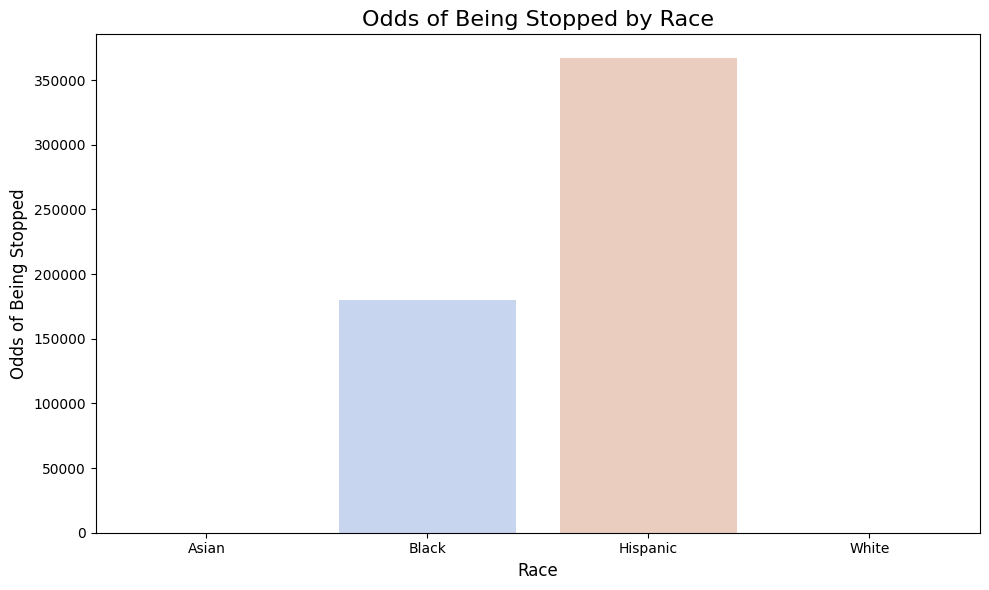

In [379]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data for plotting odds of being stopped by race
races = list(odds_of_stops.keys())
odds_values = list(odds_of_stops.values())
race_names = ['asian', 'black', 'hispanic', 'white']


# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=races, y=odds_values, palette='coolwarm')
plt.xticks(ticks=list(range(len(races))), labels=[race.capitalize() for race in race_names])

# Add labels and title
plt.title('Odds of Being Stopped by Race', fontsize=16)
plt.xlabel('Race', fontsize=12)
plt.ylabel('Odds of Being Stopped', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


#Now we look at a linear regression model to see if this yields any useful information.

In [380]:
merged_data.head()

,race,Number of Stops,Percentage of Stops,Population_Percentage,population,Difference
0,asian,769,5.881453,9.9,137443,-4.018547
1,black,2353,17.996176,4.5,62474,13.496176
2,hispanic,4799,36.703633,33.4,463698,3.303633
3,white,4334,33.147228,46.8,649733,-13.652772


In [381]:
# Fit GLM
import statsmodels.api as sm

# Independent variable (X)
X = merged_data['Population_Percentage']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Dependent variable (Y)
Y = merged_data['Percentage of Stops']

# Fit the GLM (Generalized Linear Model) - here using identity link for linear regression
glm_model = sm.GLM(Y, X, family=sm.families.Gaussian())
glm_results = glm_model.fit()

# Print out the summary of the model fit
print(glm_results.summary())


                  Generalized Linear Model Regression Results                  
Dep. Variable:     Percentage of Stops   No. Observations:                    4
Model:                             GLM   Df Residuals:                        2
Model Family:                 Gaussian   Df Model:                            1
Link Function:                Identity   Scale:                          97.767
Method:                           IRLS   Log-Likelihood:                -13.455
Date:                 Fri, 18 Oct 2024   Deviance:                       195.53
Time:                         23:00:57   Pearson chi2:                     196.
No. Iterations:                      3   Pseudo R-squ. (CS):             0.7129
Covariance Type:             nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const               

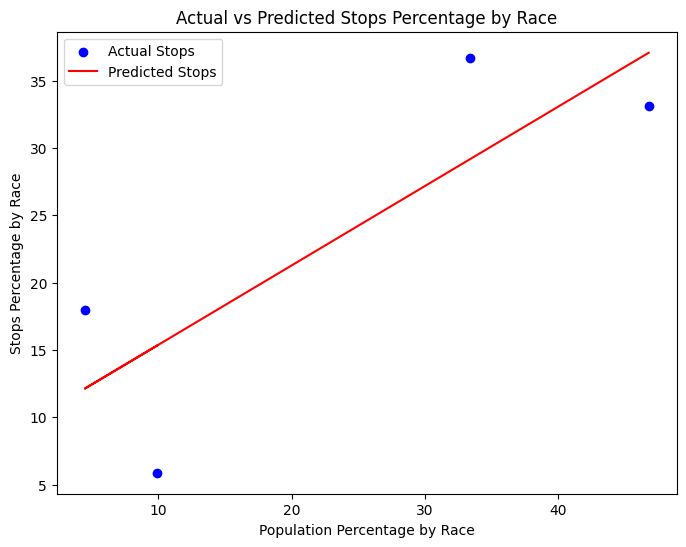

In [382]:
# Evaluate model fit Actual vs Predicted Stops by Race
predicted_stops = glm_results.predict(X)

plt.figure(figsize=(8,6))
plt.scatter(merged_data['Population_Percentage'], merged_data['Percentage of Stops'], color='blue', label='Actual Stops')
plt.plot(merged_data['Population_Percentage'], predicted_stops, color='red', label='Predicted Stops')
plt.xlabel('Population Percentage by Race')
plt.ylabel('Stops Percentage by Race')
plt.title('Actual vs Predicted Stops Percentage by Race')
plt.legend()
plt.show()

R-Squared: 0.68


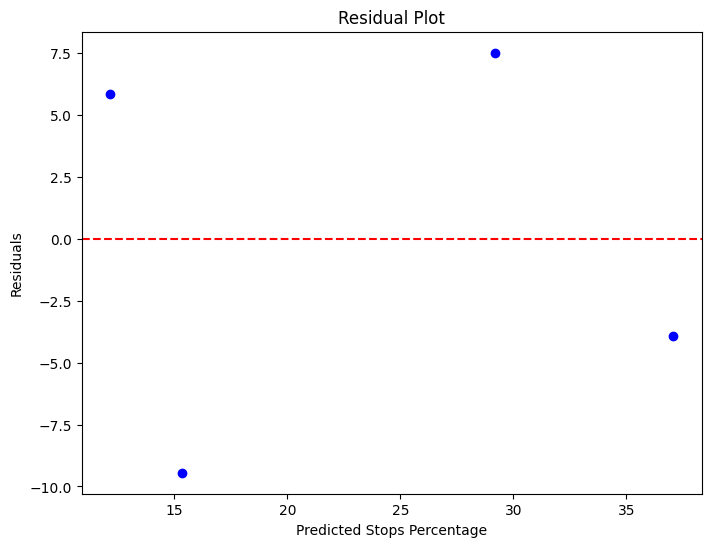

In [383]:
from sklearn.metrics import r2_score

# Calculate r-sqauared
r_squared = r2_score(Y, predicted_stops)
print(f'R-Squared: {r_squared:.2f}')

# Error Plot to check for homoscedasticity
residuals = Y - predicted_stops
plt.figure(figsize=(8,6))
plt.scatter(predicted_stops, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Stops Percentage')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


In [384]:
merged_data.head()

,race,Number of Stops,Percentage of Stops,Population_Percentage,population,Difference
0,asian,769,5.881453,9.9,137443,-4.018547
1,black,2353,17.996176,4.5,62474,13.496176
2,hispanic,4799,36.703633,33.4,463698,3.303633
3,white,4334,33.147228,46.8,649733,-13.652772


In [385]:
# Update race mapping to combine hispanic/latino(a) and hispanic/latine(x) into hispanic
race_mapping = {
    'White': 'white',
    'Hispanic/Latino(a)': 'hispanic',
    'Black/African American': 'black',
    'Asian': 'asian',
    'Hispanic/Latine(x)': 'hispanic'
}

# Apply race mapping to final_data
final_data['race'] = final_data['race'].replace(race_mapping)

<ipython-input-385-2e6de4457053>:11: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  final_data['race'] = final_data['race'].replace(race_mapping)


In [386]:
# Filter final_data to keep only the specified race categories
final_data_filtered = final_data[final_data['race'].isin(['hispanic', 'white', 'black', 'asian'])]

# If the 'race' column is categorical, remove unused categories
if pd.api.types.is_categorical_dtype(final_data_filtered['race']):
    final_data_filtered['race'] = final_data_filtered['race'].cat.remove_unused_categories()

# Check the filtered result
print(final_data_filtered['race'].unique())

['hispanic', 'white', 'black', 'asian']
Categories (4, object): ['asian', 'black', 'hispanic', 'white']


<ipython-input-386-3df0c8268d81>:5: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(final_data_filtered['race']):
<ipython-input-386-3df0c8268d81>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data_filtered['race'] = final_data_filtered['race'].cat.remove_unused_categories()


In [387]:
combined_data = pd.merge(final_data_filtered, merged_data, on='race', how='inner')



#Chi-Square Test of Independence

After completing the Chi-Squared test of independence
The data from the Chi-Squared test of independence provides strong statistical significance of racial disparities in police stops in the city of San Diego. We see that there is a statistically significant difference from what would be expected based on racial representataion in the population.

The Chi-Square statistic: 573.60
This score quantifies the difference between the observed and expected police stops in the dataset. Due to the large value, this shows that there is a large deviation bwetween actual number of police stops and the expected number.

P-Value: 3.12e-96 is close to zero, which is less than 0.05 and is considered statitically significant. This further quantifies that the actual police stops and expected police stops have a high difference.



In [388]:
import scipy.stats as stats

total_stops = combined_data['resultkey'].count()
total_stops_white = combined_data[combined_data['race'] == 'white']['resultkey'].count()
total_stops_black = combined_data[combined_data['race'] == 'black']['resultkey'].count()
total_stops_hispanic = combined_data[combined_data['race'] == 'hispanic']['resultkey'].count()
total_stops_asian = combined_data[combined_data['race'] == 'asian']['resultkey'].count()

combined_data['expected_stops'] = (combined_data['Population_Percentage'] / 100) * total_stops

chi_square_stat, p_value, dof, expected = stats.chi2_contingency(pd.crosstab(combined_data['race'], combined_data['resultkey']))

print("Chi-Square Statistic:", chi_square_stat)
print("P-Value:", p_value)


# Filter combined_data for race
filtered_data = combined_data[combined_data['race'].isin(['asian', 'black', 'hispanic', 'white'])]
print(filtered_data[['race', 'Number of Stops', 'expected_stops']].head(4))

Chi-Square Statistic: 573.6042810252288
P-Value: 3.123731834500944e-96
       race  Number of Stops  expected_stops
0  hispanic             4799        4093.170
1     white             4334        5735.340
2     black             2353         551.475
3     asian              769        1213.245


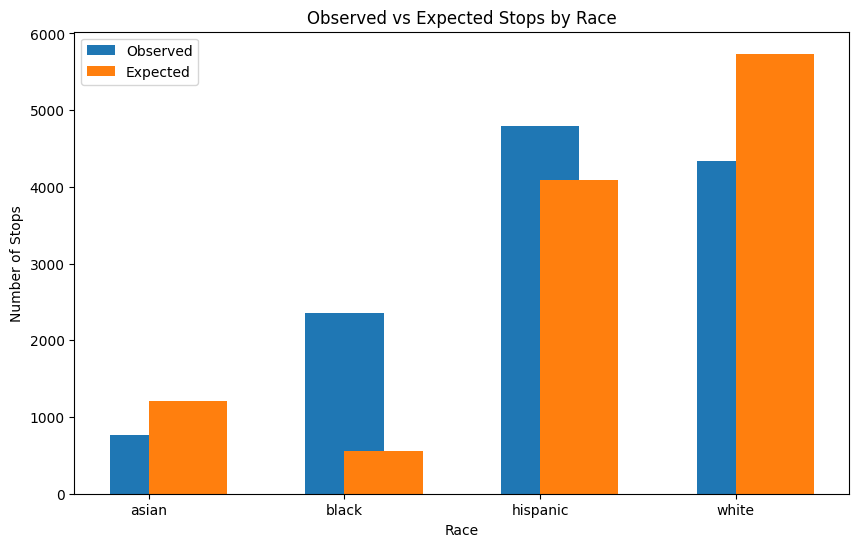

In [389]:
# Data from previous cell:
data = {
    'race': ['asian', 'black', 'hispanic', 'white'],
    'Number of Stops': [769, 2353, 4799, 4334],
    'expected_stops': [1213.245, 551.475, 4093.170, 5735.340]
}

# Create a DataFrame
filtered_data = pd.DataFrame(data)

# Plotting observed vs expected stops
plt.figure(figsize=(10, 6))
races = filtered_data['race']
observed_stops = filtered_data['Number of Stops']
expected_stops = filtered_data['expected_stops']

x = range(len(races))

plt.bar(x, observed_stops, width=0.4, label='Observed', align='center')
plt.bar(x, expected_stops, width=0.4, label='Expected', align='edge')

plt.xlabel('Race')
plt.ylabel('Number of Stops')
plt.xticks(ticks=x, labels=races)
plt.title('Observed vs Expected Stops by Race')
plt.legend()

plt.show()


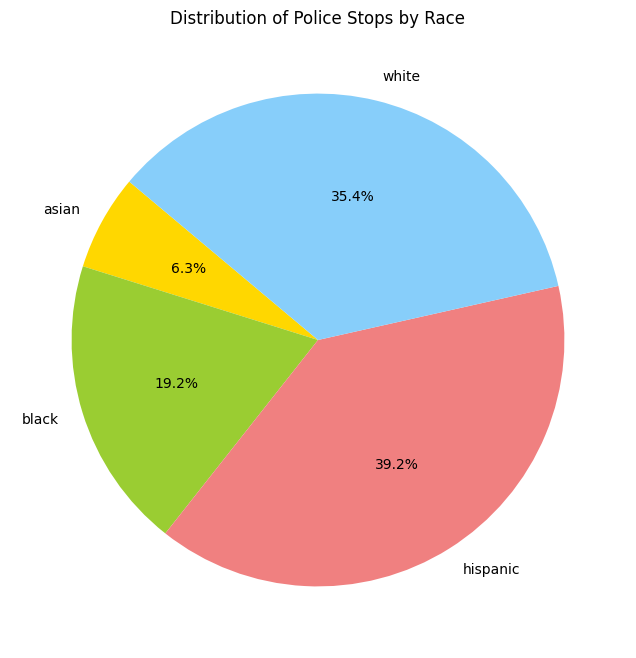

In [390]:
import matplotlib.pyplot as plt

# Data from previous cell
labels = ['asian', 'black', 'hispanic', 'white']
sizes = [769, 2353, 4799, 4334]  # Number of stops
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Add a title
plt.title('Distribution of Police Stops by Race')

# Show the chart
plt.show()

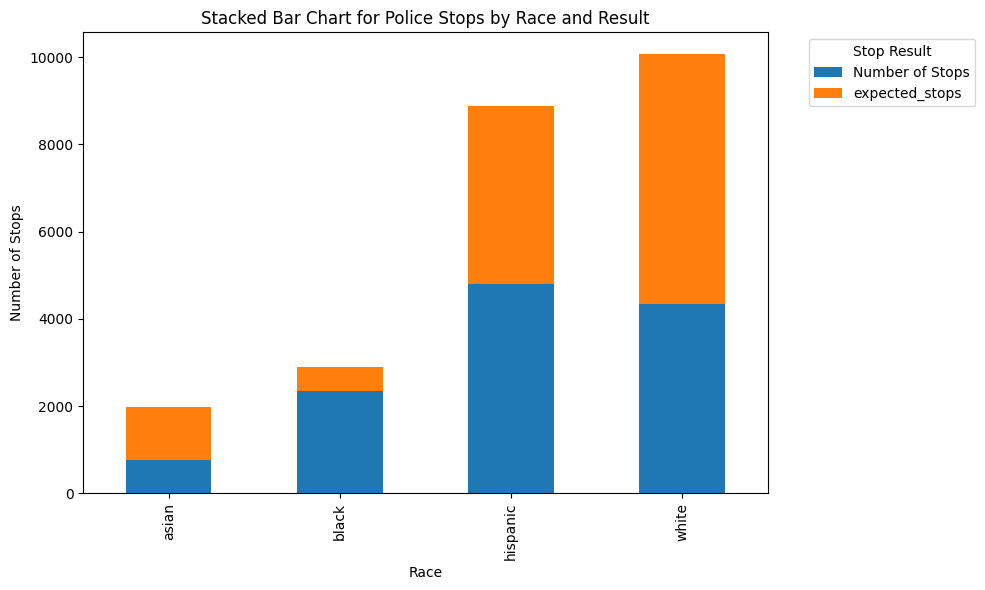

In [391]:
# Data from previous cell:
data = {
    'race': ['asian', 'black', 'hispanic', 'white'],
    'Number of Stops': [769, 2353, 4799, 4334],
    'expected_stops': [1213.245, 551.475, 4093.170, 5735.340]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Stacked bar chart
df.set_index('race').plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Stacked Bar Chart for Police Stops by Race and Result')
plt.xlabel('Race')
plt.ylabel('Number of Stops')
plt.legend(title="Stop Result", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()